<a href="https://colab.research.google.com/github/njuliann/athlete_events/blob/main/athletes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing and preparing the data

Import necessary modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

import dataset from github repo

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/njuliann/athlete_events/refs/heads/main/athlete_events.csv")

check the shape of the dataset to see whether the import has worked successfully (had some issues with this)

In [14]:
[True if df.shape == (271116, 15) else False]

[True]

Drop the "Games" column as the data is already in the "Year" and "Season" columns. For example:
* Games: 1992 Summer
* Year: 1992
* Season: Summer

In [15]:
df.drop(['Games'], axis = 1, inplace = True)

In [16]:
print(df.shape) # now there should be one less column

(271116, 14)


# Getting an overview of the data

Print an overview of the ages.

In [17]:
print(" Maximum Age: " , df.Age.max(), "\n" ,
      "Minimum Age: " , df.Age.min(), "\n",
      "Mean Age: ", df.Age.mean(), "\n", 
      "Median Age:", df.Age.median())

 Maximum Age:  97.0 
 Minimum Age:  10.0 
 Mean Age:  25.556898357297374 
 Median Age: 24.0


Get an overview of the number of values in the dataset

In [18]:
df.count()

ID        271116
Name      271116
Sex       271116
Age       261642
Height    210945
Weight    208241
Team      271116
NOC       271116
Year      271116
Season    271116
City      271116
Sport     271116
Event     271116
Medal      39783
dtype: int64

See how many missing values are there in the dataset.

In [19]:
print(df.isnull().sum())

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64


<Axes: xlabel='Age'>

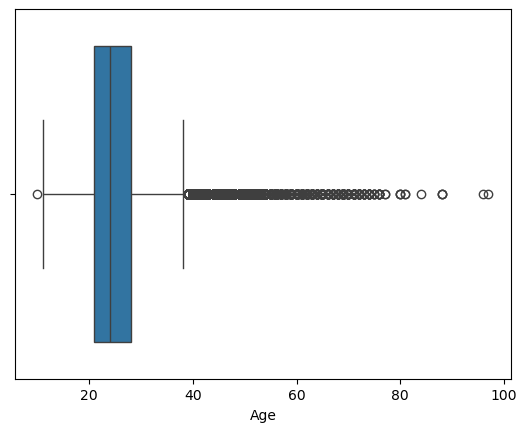

In [20]:
sns.boxplot(x=df["Age"])

<Axes: xlabel='Age', ylabel='Count'>

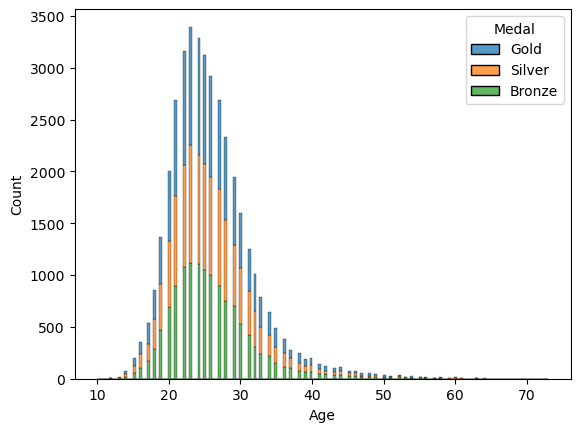

In [21]:
sns.histplot(df, x = "Age", hue = "Medal", hue_order=("Gold", "Silver", "Bronze"), multiple = "stack", )

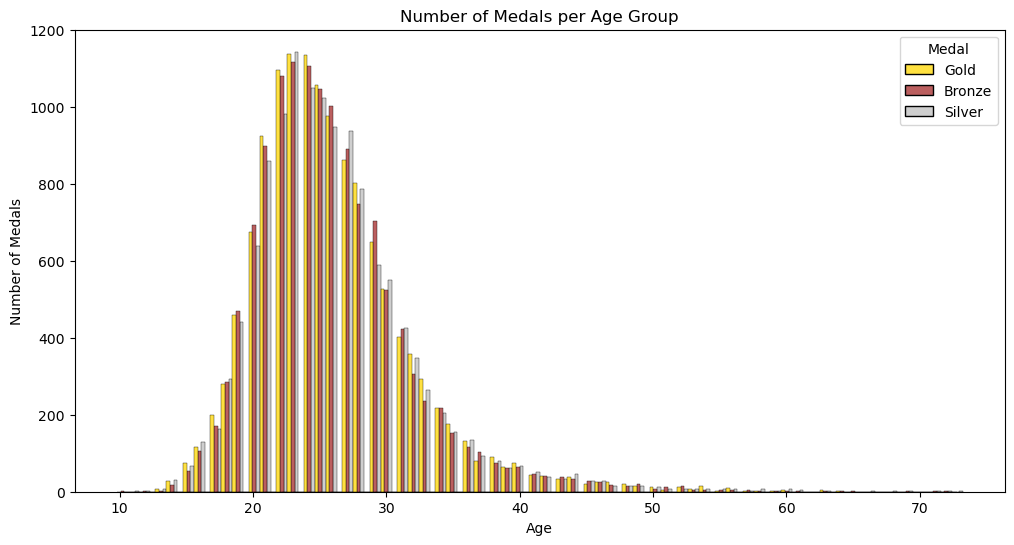

In [37]:
plt.figure(figsize=(12, 6))
sns.histplot(df, x="Age", hue="Medal", multiple="dodge", palette={"Gold": "gold", "Silver": "silver", "Bronze": "brown"}, shrink = 2)
plt.title('Number of Medals per Age Group')
plt.xlabel('Age')
plt.ylabel('Number of Medals')
plt.ticklabel_format(style="scientific", )
plt.tick_params("x")
plt.show()

Some pivot tests

In [ ]:
mean_age = df.pivot_table(
    index = 'Year',
    values = 'Age',
    aggfunc = 'mean')

mean_age.plot(
    kind = "bar",
    figsize = (50, 5),
    color = 'blue',
    )

## To do: age change per year

In [ ]:
pivot_medals = df.pivot_table(
    index = 'Age',
    columns = 'Medal',
    values = 'ID',
    aggfunc = 'sum',
    fill_value = 0)

pivot_medals.plot(
    kind = "bar",
    stacked = False,
    figsize = (50, 5),
    color = ['brown', 'gold', 'silver'],
    )

Country-wise grouping

In [50]:

df.groupby("Team")["Team"].count()

Team
30. Februar                2
A North American Team      4
Acipactli                  3
Acturus                    2
Afghanistan              126
                        ... 
Zambia                   183
Zefyros                    2
Zimbabwe                 309
Zut                        3
rn-2                       5
Name: Team, Length: 1184, dtype: int64

In [67]:
df.query('Team == "30. Februar"')
df.query('Team == "Dow Jones"')

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal
264108,132159,Mieko Yagi,F,58.0,160.0,53.0,Dow Jones,JPN,2008,Summer,Beijing,Equestrianism,"Equestrianism Mixed Dressage, Team",NaN


In [ ]:
[i for i in pd.unique(df.Team)]

In [90]:
[j.count(df.Team) for j in pd.unique(df.Team)]

TypeError: must be str, not Series

In [95]:
VC_Team = df.Team.value_counts()
print(VC_Team)

Team
United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
                 ...  
Briar                1
Hannover             1
Nan-2                1
Brentina             1
Digby                1
Name: count, Length: 1184, dtype: int64
